Business Understanding

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
Attribute Information


Loading Libraries

In [75]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Optional: XGBoost
try:
    from xgboost import XGBClassifier
except ImportError:
    print("XGBoost is not installed. You can install it using 'pip install xgboost'.")

# Model evaluation and selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature selection and engineering
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer



XGBoost is not installed. You can install it using 'pip install xgboost'.


Data Manipulation and Analysis

In this project, we are using a dataset provided by the World Health Organization (WHO) to predict the likelihood of a patient experiencing a stroke. 
The dataset includes various attributes related to patient demographics, health conditions, and lifestyle factors. 
Effective data manipulation and analysis are critical to preparing the dataset for machine learning models.

1. Loading the Dataset:
We start by loading the dataset using Pandas, which provides powerful data manipulation capabilities.
The dataset contains the following columns:

a) id: A unique identifier for each patient.
b) gender: The gender of the patient, which can be "Male", "Female", or "Other".
c) age: The age of the patient.
d) hypertension: A binary indicator (0 or 1) of whether the patient has hypertension.
e) heart_disease: A binary indicator (0 or 1) of whether the patient has any heart diseases.
f) ever_married: Indicates if the patient has ever been married ("Yes" or "No").
d) work_type: The type of work the patient does, such as "children", "Govt_job", "Never_worked", "Private", or "Self-employed".
h) Residence_type: Whether the patient lives in a "Rural" or "Urban" area.
i) avg_glucose_level: The average glucose level in the patient’s blood.
j) bmi: The body mass index of the patient.
k) smoking_status: The smoking status of the patient, which can be "formerly smoked", "never smoked", "smokes", or "Unknown".
l) stroke: The target variable, which indicates whether the patient has experienced a stroke (1) or not (0).

In [10]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


1. Display Basic Information About the DataFrame

It's essential to understand the structure and content of your dataset. 
Use the following commands to display basic information and check for missing values:

In [76]:
# Display the first few rows of the dataframe
df.head()

# Display the summary information of the dataframe
df.info()

# Display basic statistics of the dataframe
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int32  
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   int32  
 6   work_type          4908 non-null   int32  
 7   Residence_type     4908 non-null   int32  
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   int32  
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 402.6 KB


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

2. Data Cleaning

Identify and handle missing values, inconsistencies, and incorrect data types.

In [78]:
# Handling missing values
#Replace missing values in 'bmi' with the mean value
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# For 'smoking_status', replace 'Unknown' with a new category
df['smoking_status'].replace('Unknown', 'Unknown_status', inplace=True)


3. Exploratory Data Analysis (EDA)

Perform EDA to understand the distribution of variables and relationships between them.

3.1. Visualize Distributions

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


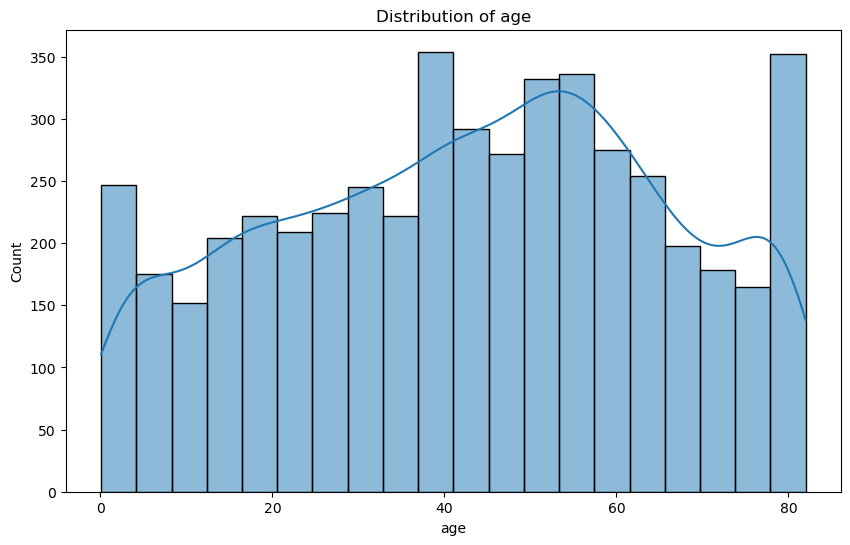

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


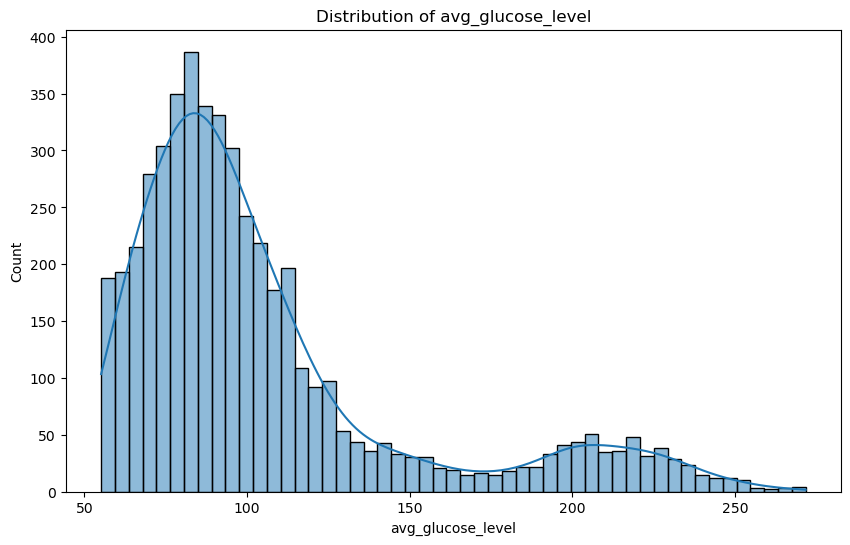

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


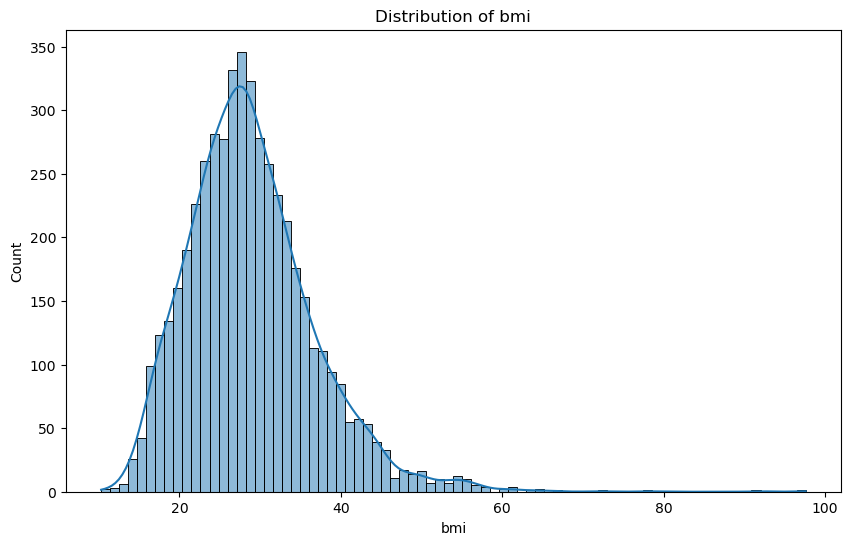

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


3.2. Visualize Categorical Features

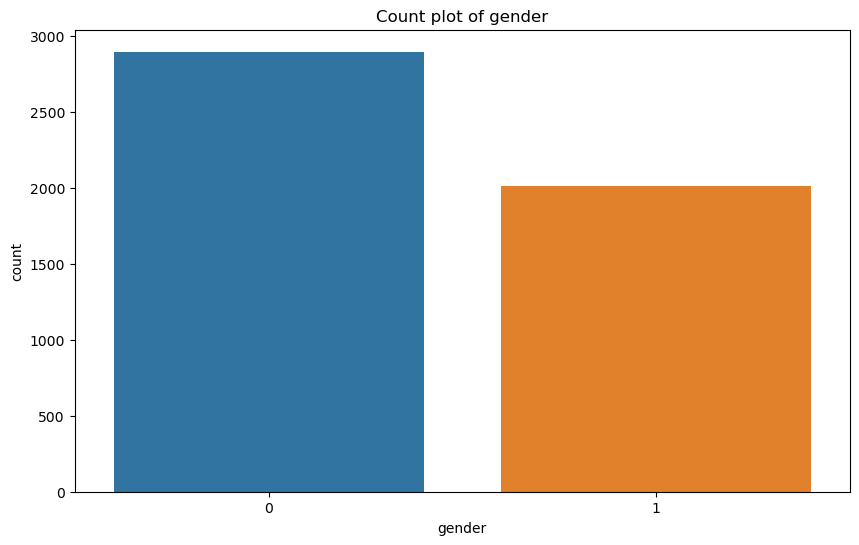

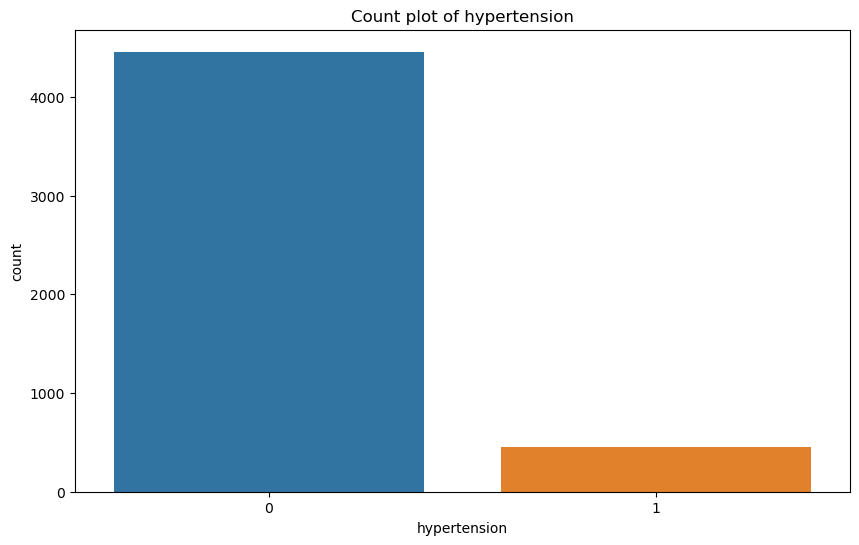

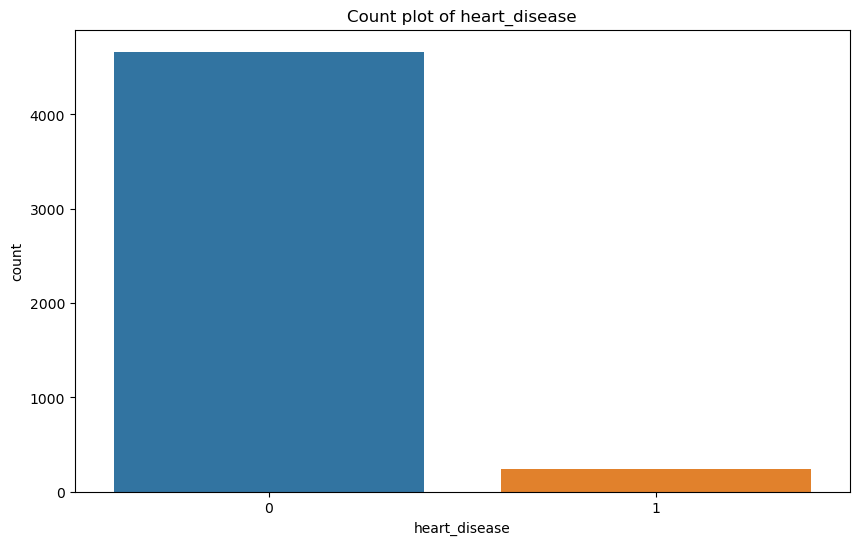

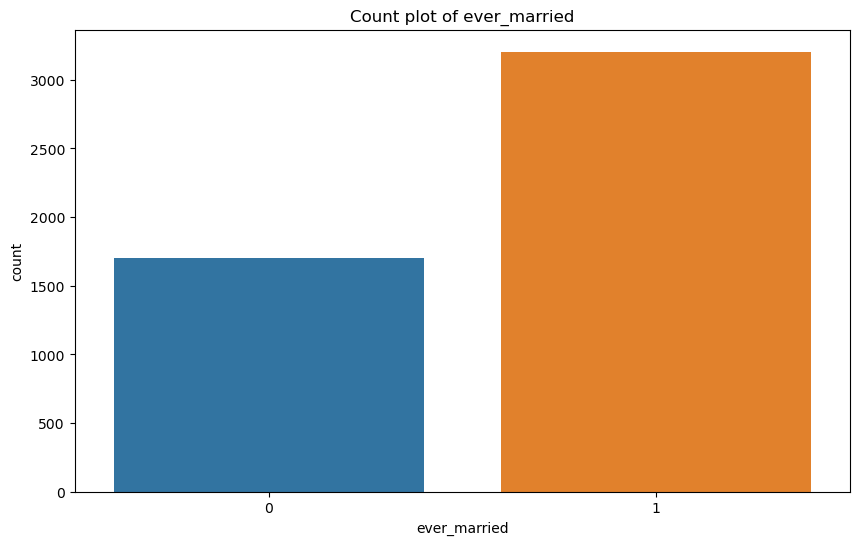

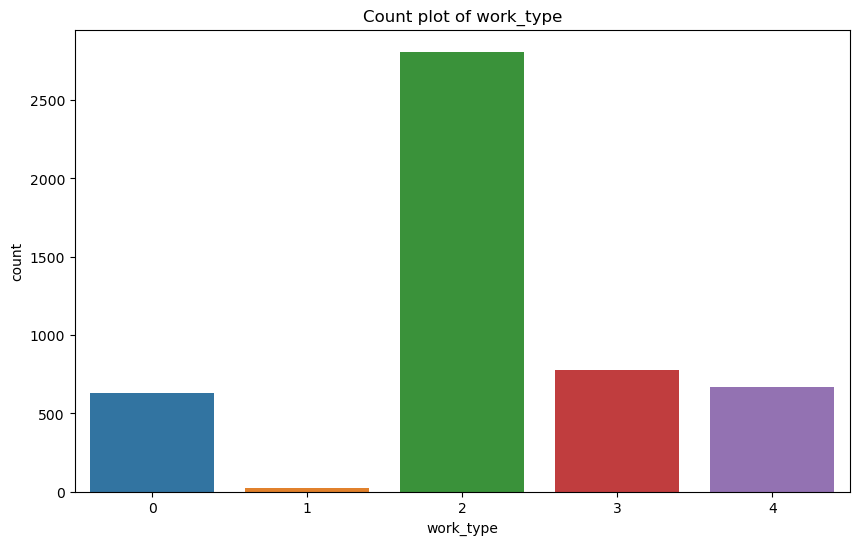

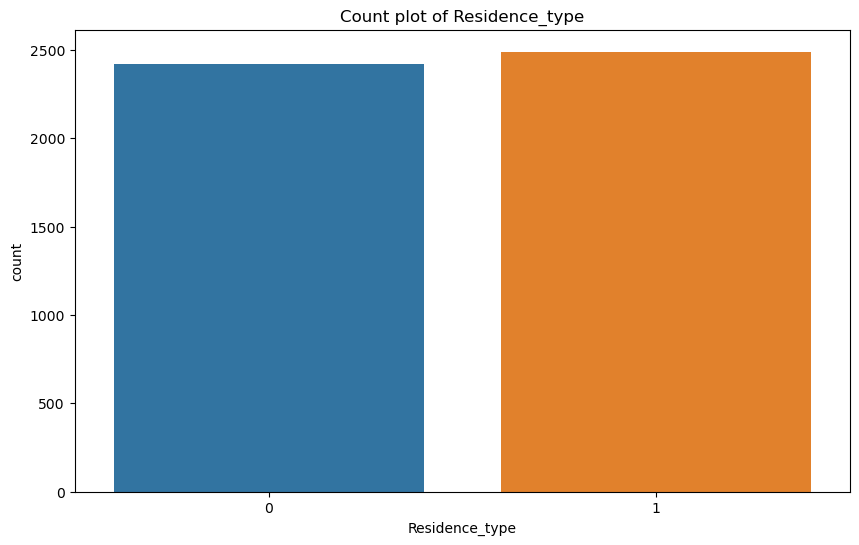

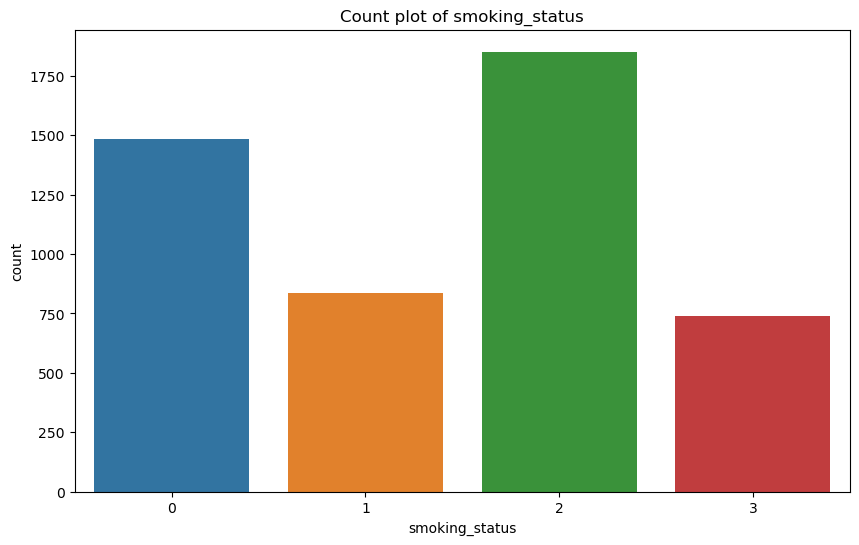

In [80]:
# Count plots for categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count plot of {feature}')
    plt.show()


3.3. Correlation Analysis

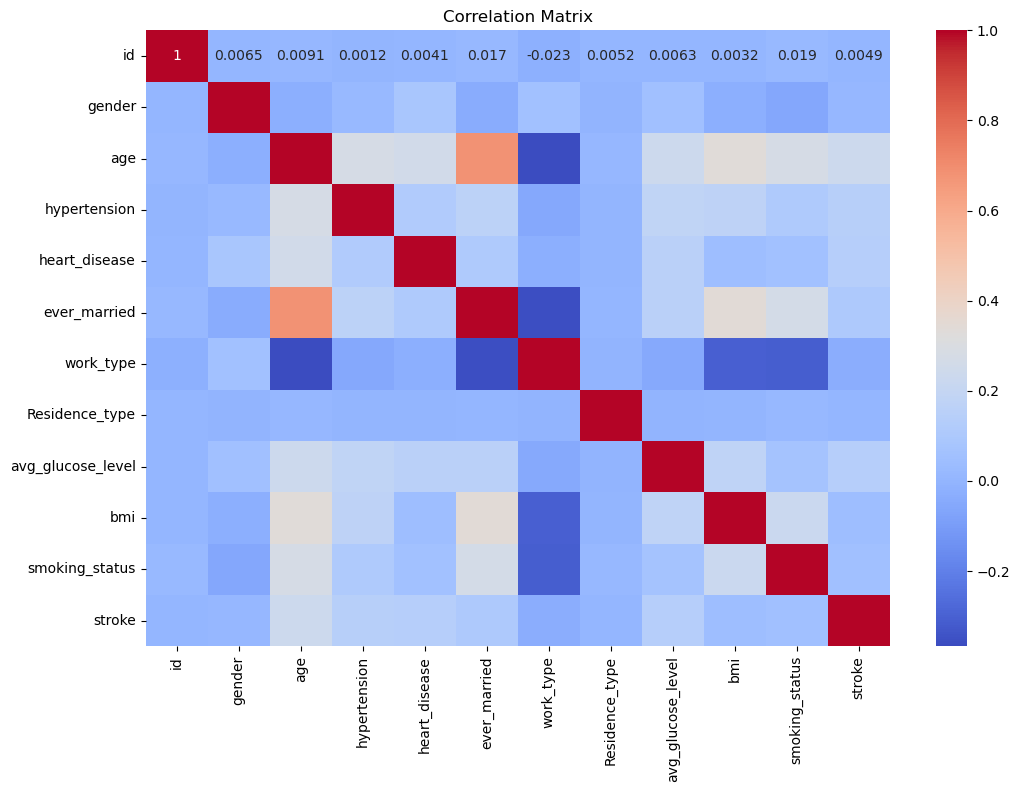

In [81]:
# Heatmap to show correlation between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


4. ###  Data Transformation

Transform the data into a suitable format for modeling. This includes encoding categorical variables and scaling numerical features.

4.1. Encoding Categorical Variables

In [82]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


4.2. Scaling Numerical Features

In [84]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(StandardScaler)


<class 'sklearn.preprocessing._data.StandardScaler'>


5. ### Splitting the Data

We shall start by splitting our data into training and testing sets. This is crucial to evaluate how well our models generalize to unseen data.

In [85]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [121]:
print(X_train.columns)


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_1', 'ever_married_1', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'Residence_type_1', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3'],
      dtype='object')


6. ### Building Baseline Models

    We shall start with simple, interpretable models like Logistic Regression and Decision Tree.

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

6.1 Evaluating Baseline Models

Evaluate the performance of our baseline models using various metrics.

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate Logistic Regression
print("Logistic Regression Model Performance")
evaluate_model(log_reg, X_test, y_test)

# Evaluate Decision Tree
print("\nDecision Tree Model Performance")
evaluate_model(decision_tree, X_test, y_test)


Logistic Regression Model Performance
Accuracy: 0.9572301425661914
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Confusion Matrix:
 [[940   0]
 [ 42   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982


Decision Tree Model Performance
Accuracy: 0.9175152749490835
Precision: 0.0851063829787234
Recall: 0.09523809523809523
F1 Score: 0.08988764044943819
ROC AUC Score: 0.5247467071935158

Confusion Matrix:
 [[897  43]
 [ 38   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       940
           1       0.09      0.10      0.09        42

    accuracy                           0.92       982
   macro

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-scor

7. Building More Complex Models

We shall create more advanced models such as Random Forest and Gradient Boosting for our data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Gradient Boosting Model
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)


7.1. Hyperparameter Tuning

Optimize the hyperparameters of our models using GridSearchCV or RandomizedSearchCV.

In [97]:
from sklearn.model_selection import GridSearchCV

# Tuning Random Forest Model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_random_forest = grid_search.best_estimator_

# Evaluate the tuned model
print("\nTuned Random Forest Model Performance")
evaluate_model(best_random_forest, X_test, y_test)


Fitting 3 folds for each of 108 candidates, totalling 324 fits

Tuned Random Forest Model Performance
Accuracy: 0.9572301425661914
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Confusion Matrix:
 [[940   0]
 [ 42   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-scor

8. Final Model Evaluation

Evaluate the final models on the testing set and compare their performance.

In [96]:
# Evaluate Gradient Boosting
print("\nGradient Boosting Model Performance")
evaluate_model(gradient_boosting, X_test, y_test)

# Evaluate the best Random Forest model from GridSearchCV
print("\nBest Random Forest Model Performance")
evaluate_model(best_random_forest, X_test, y_test)



Gradient Boosting Model Performance
Accuracy: 0.9531568228105907
Precision: 0.16666666666666666
Recall: 0.023809523809523808
F1 Score: 0.041666666666666664
ROC AUC Score: 0.5092451874366767

Confusion Matrix:
 [[935   5]
 [ 41   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       940
           1       0.17      0.02      0.04        42

    accuracy                           0.95       982
   macro avg       0.56      0.51      0.51       982
weighted avg       0.92      0.95      0.94       982


Best Random Forest Model Performance
Accuracy: 0.9572301425661914
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Confusion Matrix:
 [[940   0]
 [ 42   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
 

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-scor

9. ### Feature Scaling (if necessary):

    K-Nearest Neighbors (KNN) is sensitive to the scale of the data. It's often beneficial to scale your features.

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


9.1 Initialize the KNN Classifier:

In [99]:
classifier = KNeighborsClassifier(n_neighbors=5)


9.2 Train the Model

In [100]:
classifier.fit(X_train, y_train)


KNeighborsClassifier()

9.3 Make Predictions

In [101]:
y_pred = classifier.predict(X_test)


9.4 Evaluate the Model:

In [102]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[937   3]
 [ 41   1]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.25      0.02      0.04        42

    accuracy                           0.96       982
   macro avg       0.60      0.51      0.51       982
weighted avg       0.93      0.96      0.94       982



9.5 Tuning the Model:

We shall use GridSearchCV to find the best parameters for our model.

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.949 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.952 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.954 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.949 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.945 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.943 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 to

9.5.1. Conclusion based on the results from the cross-validation, the K-Nearest Neighbors model with the following parameters performs the best:

    Distance Metric: Manhattan
    Number of Neighbors: 7
    Weights: Uniform

Here's a summary of the performance:

    Mean Accuracy: Around 95.8%

This indicates that the model achieves an average accuracy of approximately 95.8% across different folds. This performance is quite good and suggests that the model is effective for our classification task.

10. ## Strategies to Iterate and Improve Performance:
We shall adjust n_neighbors:    
n_neighbors controls how many neighbors will cast a vote in the prediction. 
We shall test different values to find the optimal balance between bias and variance.

In [104]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.949 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.952 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.954 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.949 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.945 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.950 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=0.957 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.959 total time=   0.0s
[CV 4/5] END .....................n_neighbors=5;, score=0.958 total time=   0.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.954 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.952 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7;,

10.1 Explore Different Distance Metrics:

    The choice of distance metric (metric) can significantly impact the model's performance. 
    We shall experiment with different metrics such as 'euclidean', 'manhattan', 'chebyshev'.

In [105]:
param_grid = {'metric': ['euclidean', 'manhattan', 'chebyshev']}
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=5), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..................metric=euclidean;, score=0.950 total time=   0.0s
[CV 2/5] END ..................metric=euclidean;, score=0.957 total time=   0.0s
[CV 3/5] END ..................metric=euclidean;, score=0.959 total time=   0.0s
[CV 4/5] END ..................metric=euclidean;, score=0.958 total time=   0.0s
[CV 5/5] END ..................metric=euclidean;, score=0.954 total time=   0.0s
[CV 1/5] END ..................metric=manhattan;, score=0.954 total time=   0.0s
[CV 2/5] END ..................metric=manhattan;, score=0.958 total time=   0.0s
[CV 3/5] END ..................metric=manhattan;, score=0.958 total time=   0.0s
[CV 4/5] END ..................metric=manhattan;, score=0.959 total time=   0.0s
[CV 5/5] END ..................metric=manhattan;, score=0.955 total time=   0.0s
[CV 1/5] END ..................metric=chebyshev;, score=0.947 total time=   0.0s
[CV 2/5] END ..................metric=chebyshev;,

10.2 Weights of Neighbors:

    We shall adjust how neighbors contribute to the decision. 'uniform' weights all neighbors equally, while 'distance' weights neighbors by the inverse of their distance.

In [106]:
param_grid = {'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=5), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................weights=uniform;, score=0.950 total time=   0.0s
[CV 2/5] END ...................weights=uniform;, score=0.957 total time=   0.0s
[CV 3/5] END ...................weights=uniform;, score=0.959 total time=   0.0s
[CV 4/5] END ...................weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END ...................weights=uniform;, score=0.954 total time=   0.0s
[CV 1/5] END ..................weights=distance;, score=0.947 total time=   0.0s
[CV 2/5] END ..................weights=distance;, score=0.955 total time=   0.0s
[CV 3/5] END ..................weights=distance;, score=0.952 total time=   0.0s
[CV 4/5] END ..................weights=distance;, score=0.955 total time=   0.0s
[CV 5/5] END ..................weights=distance;, score=0.950 total time=   0.0s
{'weights': 'uniform'}


11. ### Cross-validation:

    Use cross-validation to get a more robust estimate of our model's performance and to avoid overfitting.

In [108]:
#Feature Scaling to ensure our features are properly scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=5)
print(scores)
print(f"Mean cross-validation accuracy: {scores.mean()}")


[0.95038168 0.9566879  0.95923567 0.95796178 0.95414013]
Mean cross-validation accuracy: 0.9556814314192639


11.1 Ensemble Methods:

    We shall ensemble methods like Bagging or Boosting to improve performance and reduce overfitting.

In [110]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=10, random_state=0)
bagging.fit(X_train_scaled, y_train)


C:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0)

11.2 Dimensionality Reduction:

    We shall consider Dimensionality Reductions because we have high-dimensional data, like using techniques like Principal Component Analysis (PCA) before applying KNN.

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


11.3. The Iteration Process:

    We shall use GridSearchCV to help in finding the optimal hyperparameters for the KNN classifier on the stroke prediction dataset, improving the accuracy of stroke likelihood predictions.
    
    We shall use the StandardScaler to ensure that all features in the stroke prediction dataset contribute equally to the distance computations performed by the KNN algorithm, leading to more accurate predictions.
    
    We shall use PCA to reduce the dimensionality of the stroke prediction dataset, potentially improving both the computational efficiency and the generalization capability of the KNN classifier.

In [113]:
#Full Iteration Process
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are defined

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search for optimal parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train_scaled, y_train)

# Print best parameters found
print(grid.best_params_)

# Evaluate on test set
y_pred = grid.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.949 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.952 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.954 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.949 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.945 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.943 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.945 to

11.4 Conclusion of using the K-Nearest Neighbors model: 

    This modelis well-suited for the task and performs consistently across different configurations.

    The model generally performs well across different distance metrics (euclidean, manhattan, chebyshev).
    
    The best performing configurations vary slightly, but most show accuracies around 95%, which is quite good.
    
    There doesn't seem to be a significant difference between using uniform and distance weights, with uniform weights performing slightly better in some cases.

12. ### Stroke Prediction Dataset - Data preprocessing

    1. Data Loading and Inspection

    The Stroke Prediction dataset includes information about individuals' characteristics and health metrics, such as age, gender, hypertension, heart      disease, average glucose level, BMI, work type, residence type, and smoking status.
    Initial exploration shows a mix of numeric and categorical features.

    2. Data Preprocessing Steps
       a). Numeric Features: Features: age, avg_glucose_level, bmi
       Processing: Scaling: StandardScaler is applied to normalize these features to have a mean of 0 and a standard deviation of 1.

       b). Categorical Features:

       Features: gender_1, ever_married_1, work_type_1, work_type_2, work_type_3, work_type_4, Residence_type_1, smoking_status_1, smoking_status_2,   smoking_status_3
    Processing: Encoding: OneHotEncoder is used to convert categorical variables into binary vectors (dummy variables), dropping the first category to  avoid multicollinearity.

        c). Column Transformer:

    Purpose: Combines the transformations for numeric and categorical features into a single pipeline.
    Steps:
        numeric_transformer: Applies StandardScaler to numeric features.
        categorical_transformer: Uses OneHotEncoder to transform categorical features.

        d). Pipeline Construction:

    Purpose: Constructs a unified workflow that includes data preprocessing and model building.
    Stages:
    preprocessor: Combines the ColumnTransformer for data preprocessing.
    classifier: Implements a k-Nearest Neighbors classifier with a Manhattan distance metric and 7 neighbors.

      3.  Model Training and Evaluation
        a). Training: Data Fit: The pipeline is fitted to the training data (X_train, y_train), applying all preprocessing steps.

        b). Evaluation:

    Prediction: The model predicts stroke likelihood on the test data (X_test).
    Metrics: The model performance is evaluated using classification_report, providing precision, recall, F1-score, and support metrics for each class.

Conclusion

This preprocessing pipeline aligns with best practices for preparing data for machine learning tasks. It ensures that both numeric and categorical features are appropriately transformed and standardized before being fed into a machine learning model. The final model, a k-Nearest Neighbors classifier, is evaluated using standard classification metrics to assess its performance in predicting stroke likelihood based on the dataset.

In [139]:
# Print the columns in X_train DataFrame
print("Columns in X_train:", X_train.columns)

# Print the columns in X_test DataFrame
print("Columns in X_test:", X_test.columns)


Columns in X_train: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_1', 'ever_married_1', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'Residence_type_1', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3'],
      dtype='object')
Columns in X_test: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_1', 'ever_married_1', 'work_type_1', 'work_type_2',
       'work_type_3', 'work_type_4', 'Residence_type_1', 'smoking_status_1',
       'smoking_status_2', 'smoking_status_3'],
      dtype='object')


In [138]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define numeric features and transformer
numeric_features = ['age', 'avg_glucose_level', 'bmi']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define categorical features and transformer
categorical_features = ['gender_1', 'ever_married_1', 'work_type_1', 'work_type_2',
                        'work_type_3', 'work_type_4', 'Residence_type_1', 
                        'smoking_status_1', 'smoking_status_2', 'smoking_status_3']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(metric='manhattan', n_neighbors=7))])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion on the above classification report:

The model performs very well in predicting class 0 (likely not having a stroke), with high precision (0.95), recall (1.00), and F1-score (0.97).
However, the model performs poorly in predicting class 1 (likely having a stroke), with very low precision (0.00), recall (0.00), and F1-score (0.00).
The overall accuracy of the model is 0.95, indicating that it correctly predicts the majority class (class 0) most of the time.
The macro average F1-score is 0.49, and the weighted average F1-score is 0.92, reflecting the overall performance across both classes.

Conclusion:
While the model performs very well in predicting the majority class (0), it fails to effectively predict the minority class (1). This imbalance suggests that the model may need further tuning, class rebalancing, or additional feature engineering to improve its ability to predict strokes accurately. Further investigation into feature importance and model tuning is recommended to enhance the model's performance on predicting strokes effectively.